In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%matplotlib inline

In [12]:
df = pd.read_csv(r"amz_uk_price_prediction_dataset.csv")

Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [13]:
prod_bycat = df["category"].value_counts().sort_values(ascending=False)
prod_bycat

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

<Axes: xlabel='category'>

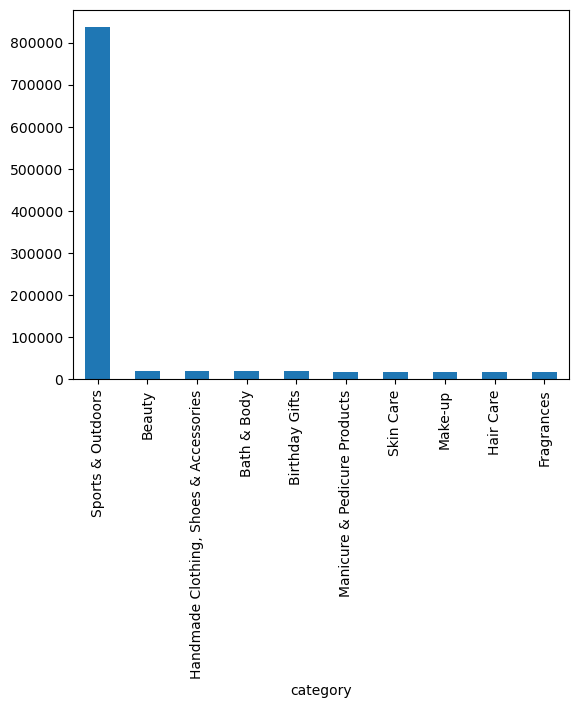

In [14]:
prod_bycat.head(10).plot.bar()

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: ylabel='count'>

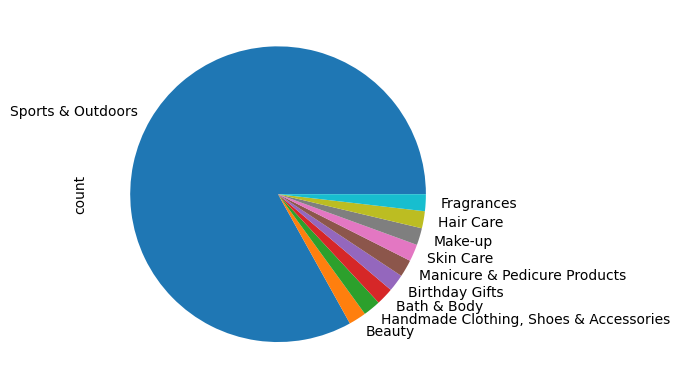

In [15]:
prod_bycat.head(10).plot.pie()

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.

What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [16]:
print(round(df["price"].mean(),2))
print(round(df["price"].median(),2))
print(round(df["price"].mode()[0],2))
# The average is much higher than the mode which means prices vary greatly

89.24
19.09
9.99


Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [17]:
round(df["price"].describe(),2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

<Axes: >

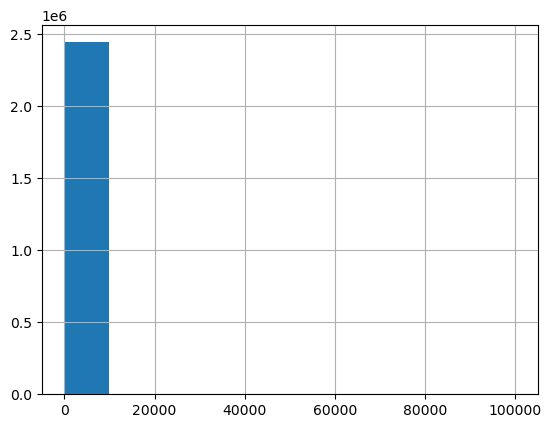

In [77]:
df['price'].hist()

In [76]:
pd.cut(df["price"], 6).value_counts()

price
(-100.0, 16666.667]       2443624
(16666.667, 33333.333]         25
(66666.667, 83333.333]          1
(83333.333, 100000.0]           1
(33333.333, 50000.0]            0
(50000.0, 66666.667]            0
Name: count, dtype: int64

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [ ]:
# When customers review products they are generally good ratings with most ratings ranging from 3 to 5 stars.

In [52]:
print(round(df["stars"].mean(),2))
print(round(df["stars"].median(),2))
print(round(df["stars"].mode()[0],2))

2.15
0.0
0.0


Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [56]:
print(round(df["stars"].var(),2))
print(round(df["stars"].std(),2))
print(df["stars"].quantile([0.25, 0.5, 0.75]))

4.82
2.19
0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [58]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: >

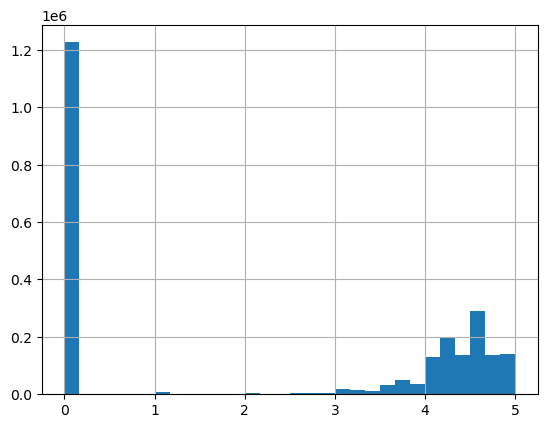

In [63]:
df['stars'].hist(bins=30)